# Vector Norm and Distance

```{contents}
:local:
```

In [1]:
%config InlineBackend.figure_format = 'svg'

from __future__ import annotations

import math
from IPython.display import display
from typing import Sequence, TypeVar, Optional
import matplotlib.pyplot as plt
import numpy as np
import rich

import sys
from pathlib import Path

def find_root_dir(current_path: Path | None = None, marker: str = '.git') -> Path | None:
    """
    Find the root directory by searching for a directory or file that serves as a
    marker.

    Parameters
    ----------
    current_path : Path | None
        The starting path to search from. If None, the current working directory
        `Path.cwd()` is used.
    marker : str
        The name of the file or directory that signifies the root.

    Returns
    -------
    Path | None
        The path to the root directory. Returns None if the marker is not found.
    """
    if not current_path:
        current_path = Path.cwd()
    current_path = current_path.resolve()
    for parent in [current_path, *current_path.parents]:
        if (parent / marker).exists():
            return parent
    return None

root_dir = find_root_dir(marker='omnivault')

if root_dir is not None:
    sys.path.append(str(root_dir))
    from omnivault.utils.visualization.style import use_svg_display
    from omnivault.linear_algebra.plotter import (
        VectorPlotter2D,
        VectorPlotter3D,
        add_vectors_to_plotter,
        add_text_annotations,
    )
    from omnivault.linear_algebra.vector import Vector2D, Vector3D
else:
    raise ImportError("Root directory not found.")

use_svg_display()

We first start off by mentioning that we will revisit this section later in the
series in a more rigorous manner. For now, we will have a first look on the
naive interpretation of vector norms and distances.

Understanding the **norm** of a vector is fundamental in various fields,
including
**[machine learning](https://en.wikipedia.org/wiki/Machine_learning)**, where it
is crucial for tasks like
**[normalizing data](https://en.wikipedia.org/wiki/Feature_scaling)**,
**[measuring similarity](https://en.wikipedia.org/wiki/Cosine_similarity)**, and
**[regularization](<https://en.wikipedia.org/wiki/Regularization_(mathematics)>)**.
In the context of
**[generative AI](https://en.wikipedia.org/wiki/Generative_adversarial_network)**
and **[embedding spaces](https://en.wikipedia.org/wiki/Word_embedding)**, norms
play an important role in quantifying the magnitude and distance of vectors,
which represent complex entities like features, words, or even images.

## Norm

We start off with the formal definition of a norm. We will also define
$\mathbf{v}$ as a vector in $\mathbb{R}^D$, where $D$ is the dimension of the
vector space:

```{math}
:label: 03-vector-norm-vector-in-rd

\mathbf{v} = \begin{bmatrix} v_1 \\ v_2 \\ \vdots \\ v_D \end{bmatrix}
```

````{prf:definition} Norm on a Vector Space
:label: 03-vector-norm-norm-on-a-vector-space

A norm on a vector space $\mathcal{V}$ over a field $\mathbb{F}$ (typically
$\mathbb{R}$ or $\mathbb{C}$), is a function


```{math}
:label: 03-vector-norm-norm-on-a-vector-space-function

\begin{aligned}
\|\cdot\|: \mathbf{V} & \rightarrow \mathbb{R}, \\
\mathbf{v} & \mapsto\|\mathbf{v}\|,
\end{aligned}
```

which assigns each vector $\mathbf{v} \in \mathcal{V}$ a real number
$\|\mathbf{v}\|$, representing the **length** of $\mathbf{v}$
{cite}`deisenroth2020mathematics`.

This function must satisfy the following properties for all scalars $\lambda$
and vectors $\mathbf{u}, \mathbf{v} \in \mathcal{V}$:

1. **Absolute Homogeneity (or Positive Scaling):**

    $$
    \|\lambda \mathbf{u}\| =
    |\lambda| \|\mathbf{u}\|
    $$

    This means the norm is scale-invariant and respects scalar multiplication.

2. **Triangle Inequality:**

    $$
    \|\mathbf{u} + \mathbf{v}\| \leq \|\mathbf{u}\| +
    \|\mathbf{v}\|
    $$

    The sum of the norms of two vectors is always greater than or equal to the
    norm of their sum.

3. **Positive Definiteness:**

    $$
    \|\mathbf{u}\| \geq 0 \text{ and }
    \|\mathbf{u}\| = 0 \iff \mathbf{u} = \mathbf{0}
    $$

    The norm of any vector is non-negative and is zero if and only if the vector
    itself is the zero vector.
````

We are being ahead of ourselves because we did not define what is a vector
space. We will revisit this later in the series. For now, treat a vector space
as a set of vectors in the $D$-dimensional space $\mathbb{R}^D$.

### $L^{p}$ Norm

With the norm well defined, we can now define the $L_p$ norm, which is a
specific case of the norm function. The $L_p$ is a generalization of the concept
of "length" for vectors in the **_vector space_** $\mathcal{V}$.

```{prf:definition} $L_p$ Norm
:label: 03-vector-norm-lp-norm

For a vector space $\mathcal{V} = \mathbb{R}^D$ over the field
$\mathbb{F} =
\mathbb{R}$, the $L_p$ norm is a function defined as:

$$
\begin{aligned}
\|\cdot\|_p : \mathcal{V} & \rightarrow \mathbb{R}, \\
\mathbf{v} & \mapsto \left( \sum_{d=1}^D |v_d|^p \right)^{\frac{1}{p}},
\end{aligned}
$$

where each vector $\mathbf{v} \in \mathcal{V}$ (defined as in
{eq}`03-vector-norm-vector-in-rd`) is assigned a real number $\|\mathbf{v}\|_p$,
representing the $L_p$ norm of $\mathbf{v}$.

In other words, for a vector $\mathbf{v} \in \mathbb{R}^D$, the $L_p$ norm of
$\mathbf{v}$, denoted as $\|\mathbf{v}\|_p$, is defined as:

$$\|\mathbf{v}\|_p = \left( \sum_{d=1}^{D} |v_d|^p \right)^{\frac{1}{p}},$$

where $v_1, v_2, \ldots, v_D$ are the components of the vector $\mathbf{v}$, and
$p$ is a real number greater than or equal to 1.
```

One can easily verify that the $L_p$ norm satisfies the properties of a norm
function in {prf:ref}`03-vector-norm-norm-on-a-vector-space`.

As we shall see later (likely when we discuss about analytic geometry), the
choice of $p$ determines the metric's sensitivity to differences in vector
components, influencing its application in various algorithms.

### $L_1$ Norm (Manhattan Norm)

The $L_1$ **norm**, also known as the **Manhattan norm** or **Taxicab norm**, is
a specific case of the $L_p$ norm where $p = 1$.

```{prf:definition} $L_1$ Norm
:label: 03-vector-norm-l1-norm

For the same vector space $\mathcal{V} = \mathbb{R}^D$, the $L_1$ norm is
defined by:

$$
\begin{aligned}
\|\cdot\|_1 : \mathcal{V} & \rightarrow \mathbb{R}, \\
\mathbf{v} & \mapsto \sum_{d=1}^D |v_d|,
\end{aligned}
$$

assigning to each vector $\mathbf{v}$ (defined as in
{eq}`03-vector-norm-vector-in-rd`) the sum of the absolute values of its
components, $\|\mathbf{v}\|_1$.

In other words, for a vector $\mathbf{v} \in \mathbb{R}^D$, the $L_1$ norm of
$\mathbf{v}$, denoted as $\|\mathbf{v}\|_1$, is defined as:

$$\|\mathbf{v}\|_1 = \sum_{d=1}^{D} |v_d|.$$
```

This norm is called the Manhattan norm because it is the distance between two
points in a grid-like Manhattan street layout, where the shortest path between
two points is the sum of the horizontal and vertical distances. This metric sums
the absolute values of the vector components. Geometrically, it measures the
distance a taxicab (hence the name taxicab) would travel in a grid-like path in
$\mathbb{R}^D$. In machine learning, the $L_1$ norm is often used for
[**regularization**](<https://en.wikipedia.org/wiki/Lasso_(statistics)>),
encouraging sparsity in the model parameters.

```{figure} ./assets/wikipedia-520px-Manhattan_distance.svg.png
---
name: 03-vector-norm-manhattan-distance
---

Taxicab geometry versus Euclidean distance: In taxicab geometry, the red,
yellow, and blue paths all have the same length of 12. In Euclidean
geometry, the green line has length $6 \sqrt{2} \approx 8.49$ and is the unique
shortest path, while the other paths have the longer length of 12.

**Image Credit: [Wikipedia](https://en.wikipedia.org/wiki/Taxicab_geometry)**
```

### $L_2$ Norm (Euclidean Norm)

The $L_2$ **norm**, or **Euclidean norm**, obtained by setting $p = 2$, is the
most familiar norm in machine learning.

```{prf:definition} L2 Norm
:label: 03-vector-norm-l2-norm

Similarly, for $\mathcal{V} = \mathbb{R}^D$, the $L_2$ norm is given by:

$$
\begin{aligned}
\|\cdot\|_2 : \mathcal{V} & \rightarrow \mathbb{R}, \\
\mathbf{v} & \mapsto \left( \sum_{d=1}^D |v_d|^2 \right)^{\frac{1}{2}},
\end{aligned}
$$

where $\|\mathbf{v}\|_2$ is the Euclidean length of the vector $\mathbf{v}$
(defined as in {eq}`03-vector-norm-vector-in-rd`).

In other words, for a vector $\mathbf{v} \in \mathbb{R}^D$, the $L_2$ norm of
$\mathbf{v}$, denoted as $\|\mathbf{v}\|_2$, is defined as:

$$\|\mathbf{v}\|_2 = \sqrt{\sum_{d=1}^{D} |v_d|^2}.$$
```

It measures the "straight-line" distance from the origin to the point in
$\mathbb{R}^D$ represented by $\mathbf{v}$. This norm is extensively used in
machine learning to measure the magnitude of vectors, in optimization algorithms
(like gradient descent), and in computing distances between points in feature
space.

With reference to figure {numref}`03-vector-norm-manhattan-distance`, the green
line defines the Euclidean distance between two points in $\mathbb{R}^2$ and is
the shortest path between the two points.

Let's see how the L2 norm looks like in a 2D space.

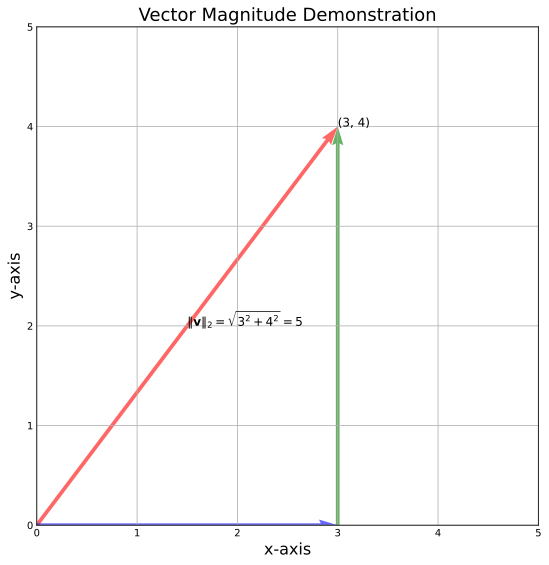

In [2]:
fig, ax = plt.subplots(figsize=(9, 9))

plotter = VectorPlotter2D(
    fig=fig,
    ax=ax,
    ax_kwargs={
        "set_xlim": {"left": 0, "right": 5},
        "set_ylim": {"bottom": 0, "top": 5},
        "set_xlabel": {"xlabel": "x-axis", "fontsize": 16},
        "set_ylabel": {"ylabel": "y-axis", "fontsize": 16},
        "set_title": {"label": "Vector Magnitude Demonstration", "size": 18},
    },
)

v = Vector2D(
    origin=(0, 0),
    direction=(3, 4),
    color="r",
    label="$\|\mathbf{v}\|_2 = \sqrt{3^2 + 4^2} = 5$",
)
horizontal_component_v = Vector2D(
    origin=(0, 0), direction=(3, 0), color="b", label="$v_1 = 3$"
)
vertical_component_v = Vector2D(
    origin=(3, 0), direction=(0, 4), color="g", label="$v_2 = 4$"
)
add_vectors_to_plotter(plotter, [v, horizontal_component_v, vertical_component_v])
add_text_annotations(plotter, [v])

plotter.plot()

Notice that the calculation is equivalent to the
[**Pythagorean theorem**](https://en.wikipedia.org/wiki/Pythagorean_theorem),
where the length of the hypotenuse is the square root of the sum of the squares
of the other two sides.

We can easily calculate the L2 norm of a vector using NumPy:

In [3]:
u = np.array([3, 4])
rich.print(f"Norm of u: {np.linalg.norm(u)}")

Norm of u: 5.0

And as convenience, our vector object `v` has an property/attribute `l2_norm`
(`magnitude`) that returns the L2 norm of the vector.

In [4]:
v = Vector2D(
    origin=(0, 0),
    direction=(3, 4),
    color="r",
    label="$\|\mathbf{v}\|_2 = \sqrt{3^2 + 4^2} = 5$",
)
rich.print(f"Norm of v: {v.l2_norm}")

Norm of v: 5.0

#### Generalization of the Pythagorean Theorem to $D$ Dimensions

The Pythagorean theorem generalizes to $D$ dimensions, where the length of the
hypotenuse is the square root of the sum of the squares of the other sides.

We can use 3D as a way to illustrate this. The following series of images are
taken from
[Math is Fun](https://www.mathsisfun.com/geometry/pythagoras-3d.html).

First, consider {numref}`03-vector-norm-pythagorean-theorem-3d-a`, we want to
find the length of the diagonal.

```{figure} ./assets/mathsisfun-pythagoras-3d-a.svg
---
name: 03-vector-norm-pythagorean-theorem-3d-a
---

Finding the length of the diagonal.

**Image Credit:
[Math is Fun](https://www.mathsisfun.com/geometry/pythagoras-3d.html)**
```

We can first use Pythagorean theorem to find the length of the diagonal of the
base.

$$
c = \sqrt{x^2 + y^2}
$$

where $c$ is the length of the diagonal of the base.

```{figure} ./assets/mathsisfun-pythagoras-3d-b.svg
---
name: 03-vector-norm-pythagorean-theorem-3d-b
---

**Image Credit:
[Math is Fun](https://www.mathsisfun.com/geometry/pythagoras-3d.html)**
```

Then, the diagonal base serves as one of the sides of the triangle that we want
to find.

```{figure} ./assets/mathsisfun-pythagoras-3d-c.svg
---
name: 03-vector-norm-pythagorean-theorem-3d-c
---

**Image Credit:
[Math is Fun](https://www.mathsisfun.com/geometry/pythagoras-3d.html)**
```

Finally, we use Pythagorean theorem again to find the length of the diagonal.

$$
\begin{aligned}
d   &= \sqrt{c^2 + z^2} \\
    &= \sqrt{\left(\sqrt{x^2 + y^2}\right)^2 + z^2} \\
    &= \sqrt{x^2 + y^2 + z^2}
\end{aligned}
$$

```{figure} ./assets/mathsisfun-pythagoras-3d-d.svg
---
name: 03-vector-norm-pythagorean-theorem-3d
---

The Pythagorean Theorem in 3D.

**Image Credit:
[Math is Fun](https://www.mathsisfun.com/geometry/pythagoras-3d.html)**
```

Without loss of generality (we are being less pedantic here), we can generalize
the Pythagorean theorem to $D$ dimensions, illustrated in
{numref}`03-vector-norm-pythagorean-theorem-d-dimensions` below.

We denote $d$ as the length of the diagonal, and $a_1, a_2, \ldots, a_D$ as the
length of the sides of the triangle (or the vector components).

```{list-table} Generalization of the Pythagorean Theorem to $D$ Dimensions
:header-rows: 1
:name: 03-vector-norm-pythagorean-theorem-d-dimensions

* - Dimension
  - Pythagoras
  - Distance/Norm
* - 1
  - $d^2 = a_1^2$
  - $d = \sqrt{a_1^2} = \|a\|_2$
* - 2
  - $d^2 = a_1^2 + a_2^2$
  - $d = \sqrt{a_1^2 + a_2^2} = \|a\|_2$
* - 3
  - $d^2 = a_1^2 + a_2^2 + a_3^2$
  - $d = \sqrt{a_1^2 + a_2^2 + a_3^2} = \|a\|_2$
* - ...
  - ...
  - ...
* - $D$
  - $d^2 = a_1^2 + a_2^2 + \cdots + a_D^2$
  - $d = \sqrt{a_1^2 + a_2^2 + \cdots + a_D^2} = \|a\|_2$
```

## Distance

We have been using distance and norm interchangeably. However, they are not
_exactly_ the same.

The key difference (without going to deep into real analysis and metric spaces)
is that the **norm** as defined in
{prf:ref}`03-vector-norm-norm-on-a-vector-space` is a function that maps a
vector to a field $\mathbb{F}$ (i.e. real number $\mathbb{R}$), while the
**distance** is a function that maps a pair of vectors to a field $\mathbb{F}$.

````{prf:definition} Distance
:label: 03-vector-norm-distance

A distance on a vector space $\mathcal{V}$ over a field $\mathbb{F}$ (typically
$\mathbb{R}$ or $\mathbb{C}$), is a function

```{math}
:label: 03-vector-norm-distance-function

\begin{aligned}
d: \mathcal{V} \times \mathcal{V} & \rightarrow \mathbb{R}, \\
(\mathbf{u}, \mathbf{v}) & \mapsto d(\mathbf{u}, \mathbf{v}),
\end{aligned}
```

which assigns each pair of vectors $\mathbf{u}, \mathbf{v} \in \mathcal{V}$ a
real number $d(\mathbf{u}, \mathbf{v})$, representing the **distance** between
$\mathbf{u}$ and $\mathbf{v}$. This function must satisfy the following
properties for all vectors $\mathbf{u}, \mathbf{v}, \mathbf{w} \in \mathcal{V}$
{cite}`muscat2014functional`:

1. **Non-negativity:**

    $$
    d(\mathbf{u}, \mathbf{v}) \geq 0
    $$

    The distance between any two vectors is non-negative.

2. **Identity of Indiscernibles:**

    $$
    d(\mathbf{u}, \mathbf{v}) = 0 \iff \mathbf{u} = \mathbf{v}
    $$

    The distance between two vectors is zero if and only if the vectors are
    identical.

3. **Symmetry:**

    $$
    d(\mathbf{u}, \mathbf{v}) = d(\mathbf{v}, \mathbf{u})
    $$

    The distance between two vectors is the same regardless of the order of
    the vectors.

4. **Triangle Inequality:**

    $$
    d(\mathbf{u}, \mathbf{v}) \leq d(\mathbf{u}, \mathbf{w}) +
    d(\mathbf{w}, \mathbf{v})
    $$

    The distance between two vectors is always less than or equal to the sum
    of the distances between the vectors and a third vector.
````

We say that every norm induces a distance metric defined in
{prf:ref}`03-vector-norm-distance`.

**Why?**

Given a norm $\|\cdot\|$ on a vector space $\mathcal{V}$, one can define a
distance function induced by this norm as
$d(\mathbf{u}, \mathbf{v})=\|\mathbf{u}-\mathbf{v}\|$ for all
$\mathbf{u}, \mathbf{v} \in \mathcal{V}$. This distance function satisfies the
metric space properties:

1. **Non-negativity**: For any vectors $\mathbf{u}, \mathbf{v}$, the distance
   $d(\mathbf{u}, \mathbf{v})$ is never negative because norms are always
   non-negative. This is a direct result of the norm's property of **positive
   definiteness** ({prf:ref}`03-vector-norm-norm-on-a-vector-space`).

2. **Identity of Indiscernibles**: The distance $d(\mathbf{u}, \mathbf{v})$ is
   zero if and only if $\mathbf{u} = \mathbf{v}$. This follows from the positive
   definiteness property ({prf:ref}`03-vector-norm-norm-on-a-vector-space`) of
   norms which states that $\|\mathbf{u}\| =
   0$ if and only if
   $\mathbf{u} = \mathbf{0}$. Thus, $\|\mathbf{u} -
   \mathbf{v}\| = 0$ implies
   $\mathbf{u} - \mathbf{v} = \mathbf{0}$, which means
   $\mathbf{u} = \mathbf{v}$.

3. **Symmetry**: The distance function is symmetric, meaning
   $d(\mathbf{u},
   \mathbf{v}) = d(\mathbf{v}, \mathbf{u})$ for all
   $\mathbf{u}, \mathbf{v}$. This is because
   $\|\mathbf{u}-\mathbf{v}\| = \|\mathbf{v}-\mathbf{u}\|$, as the norm of a
   vector remains the same if its sign is reversed. This follows directly from
   the norm's property of **absolute homogeneity**
   ({prf:ref}`03-vector-norm-norm-on-a-vector-space`) because you can just set
   $\lambda = -1$. Thus,
   $\|\mathbf{u}-\mathbf{v}\| = \|-1\| \|\mathbf{v}-\mathbf{u}\| =
    \|\mathbf{v}-\mathbf{u}\|$.

4. **Triangle Inequality**: The distance satisfies the triangle inequality,
   which states that for any
   $\mathbf{u}, \mathbf{v}, \mathbf{w} \in
   \mathcal{V}$, the inequality
   $d(\mathbf{u}, \mathbf{w}) \leq
   d(\mathbf{u}, \mathbf{v}) + d(\mathbf{v}, \mathbf{w})$
   holds. This is a consequence of the norm's triangle inequality
   ({prf:ref}`03-vector-norm-norm-on-a-vector-space`),
   $\|\mathbf{u}+\mathbf{v}\|
   \leq \|\mathbf{u}\| + \|\mathbf{v}\|$, applied
   to the vectors $\mathbf{u}-\mathbf{v}$ and $\mathbf{v}-\mathbf{w}$, which
   yields
   $\|\mathbf{u}-\mathbf{w}\| \leq \|\mathbf{u}-\mathbf{v}\| + \|\mathbf{v}-\mathbf{w}\|$.

Thus, the norm-induced distance function $d$ adheres to all the axioms of a
metric and therefore defines a metric space on $\mathcal{V}$. This provides a
way to measure "distances" in vector spaces that are consistent with the
structure and properties of the space as defined by the norm.

For example, the $L_2$ norm $\|\cdot\|_2$ induces the Euclidean distance
$d(\mathbf{u}, \mathbf{v}) = \|\mathbf{u}-\mathbf{v}\|_2$ between two vectors
$\mathbf{u}, \mathbf{v} \in \mathbb{R}^D$. The key to remember that the
transition of a norm to a distance is the subtraction of two vectors. So the
domain of the distance function is a pair of vectors, while the domain of the
norm function is a single vector. There is no confusion because
$d(\mathbf{u}, \mathbf{v})$ indeed takes in two vectors as input, while the
right hand side of the equation $\|\mathbf{u}-\mathbf{v}\|_2$ is a single
vector.

Furthermore, the $L_2$ norm of a single vector $\mathbf{v}$ is **_equivalent_**
to the Euclidean distance between $\mathbf{v}$ and the origin $\mathbf{0}$, and
the $L_2$ norm of the difference between two vectors $\mathbf{u}$ and
$\mathbf{v}$ is **_equivalent_** to the Euclidean distance between $\mathbf{u}$
and $\mathbf{v}$. Therefore, we often use the term "norm" and "distance"
interchangeably because if we set the component $\mathbf{v} = \mathbf{0}$, then
we recover the norm of $\mathbf{u}$.

It is important to note that while norms always induce a metric, not all metrics
arise from norms. A metric that does not come from a norm might not satisfy the
properties of homogeneity or the triangle inequality in the same way that a norm
does.

For such distances, while they may satisfy the properties required of a metric,
they cannot be expressed as the norm of the difference between two vectors. Two
[**examples**](https://math.stackexchange.com/questions/172028/difference-between-norm-and-distance)
are given:

1. The discrete metric:

    $$
    d(x, y)= \begin{cases}0 & \text { if } x=y \\ 1 & \text { if } x \neq y\end{cases}
    $$

2. The arctangent metric on $\mathbb{R}$:

    $$
    d(x, y)=|\arctan (x)-\arctan (y)|
    $$

Both of these satisfy the properties of a metric but are not induced by any norm
because they do not satisfy the homogeneity property (scaling) and, in the case
of the discrete metric, do not satisfy the triangle inequality as it would be
defined by a norm.

## Closing: Relevance of Vector Norms and Distances in Machine Learning and Deep Learning

The concepts of vector norms and distances, as explored previously, play a
crucial role in the realms of
[machine learning](https://en.wikipedia.org/wiki/Machine_learning) and
[deep learning](https://en.wikipedia.org/wiki/Deep_learning). Their relevance
can be highlighted in several key aspects of these fields:

1. **Feature Normalization**: In many machine learning algorithms, it's
   important to [normalize](https://en.wikipedia.org/wiki/Feature_scaling) or
   scale features so that they contribute equally to the learning process.
   Vector norms, especially the **$L_2$** norm, are often used to normalize
   data, ensuring that each feature contributes proportionately to the overall
   model.

2. **Similarity and Distance Metrics**: In clustering algorithms like
   [K-means](https://en.wikipedia.org/wiki/K-means_clustering) or in nearest
   neighbor searches, the notion of distance between data points is fundamental.
   Here, norms (like the Euclidean or Manhattan norms) define the metrics used
   to quantify the _similarity_ or _dissimilarity_ between points in the feature
   space.

3. **Regularization in Optimization**: In both machine and deep learning,
   [regularization](<https://en.wikipedia.org/wiki/Regularization_(mathematics)>)
   techniques are employed to prevent overfitting. The **$L_1$** (Lasso) and
   **$L_2$** (Ridge) norms are particularly notable for their use in
   regularization terms. **$L_1$** regularization encourages sparsity in the
   model parameters, which can be beneficial for feature selection, while
   **$
   L_2$** regularization penalizes large weights, promoting smoother
   solution spaces.

4. **Embedding Spaces in Deep Learning**: In deep learning, particularly in
   areas like
   [natural language processing](https://en.wikipedia.org/wiki/Natural_language_processing)
   or image recognition, the concept of _embedding spaces_ is vital. These are
   high-dimensional spaces where similar items are placed closer together. Norms
   and distances in these spaces are used to measure the closeness or similarity
   of different entities (like words, sentences, or images), impacting the
   performance of models like neural networks.

5. **Gradient Descent and Backpropagation**: The core of training deep learning
   models involves optimization techniques like
   [gradient descent](https://en.wikipedia.org/wiki/Gradient_descent). The
   **$
   L_2$** norm is particularly important in quantifying the magnitude of
   gradients, guiding the update steps in the learning process.

6. **Loss Functions**: Many machine learning models are trained by minimizing a
   [loss function](https://en.wikipedia.org/wiki/Loss_function). The choice of
   this function often involves norms and distances. For instance, mean squared
   error (a common loss function) is essentially an **$L_2$** norm of the error
   vector.

7. **Autoencoders in Deep Learning**:
   [Autoencoders](https://en.wikipedia.org/wiki/Autoencoder), used for
   dimensionality reduction or feature learning, often utilize norms to measure
   the _reconstruction loss_, i.e., the difference between the input and its
   reconstruction.

8. **Anomaly Detection**: In anomaly detection, distances from a norm or a
   threshold often signify whether a data point is an _anomaly_ or not.

In conclusion, vector norms and distances are not just abstract mathematical
concepts; they are tools deeply ingrained in the fabric of machine learning and
deep learning. They provide the means to measure, compare, and optimize in the
multi-dimensional spaces that these fields operate in, making them indispensable
in the toolkit of anyone working in these domains.

This is by no means we will deal with norms and distances. We will revisit this
when we discuss about analytic geometry - which spans concepts such as
similarity, inner product, orthogonality, and projections.

## References and Further Readings

-   Deisenroth, M. P., Faisal, A. A., & Ong, C. S. (2020). _Mathematics for
    Machine Learning_. Cambridge University Press. (Chapter 3.1, Norms).
-   Muscat, J. Functional Analysis An Introduction to Metric Spaces, Hilbert
    Spaces, and Banach Algebras, Springer, 2014.
-   [Math Is Fun - Pythagoras in 3D](https://www.mathsisfun.com/geometry/pythagoras-3d.html)
-   [Wikipedia - Taxicab (Manhattan) Geometry](https://en.wikipedia.org/wiki/Taxicab_geometry)
-   [Wikipedia - Metric Space](https://en.wikipedia.org/wiki/Metric_space)
-   [Wikipedia - Vector Space](https://en.wikipedia.org/wiki/Vector_space)
-   [Math StackExchange - Difference between Norm and Distance](https://math.stackexchange.com/questions/172028/difference-between-norm-and-distance)